# week1 day 3 customer analysis round 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline


In [2]:
df_mca=pd.read_csv('marketing_customer_analysis.csv')

In [3]:
cols=[]
for i in range (len(df_mca.columns)):
    cols.append(df_mca.columns[i].lower())
df_mca.columns=cols
df_mca.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [4]:
df_mca=df_mca.drop_duplicates() # drops duplicates

In [5]:
df_mca=df_mca[df_mca['income']>0]

In [6]:
df_mca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6817 entries, 0 to 9132
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       6817 non-null   object 
 1   state                          6817 non-null   object 
 2   customer lifetime value        6817 non-null   float64
 3   response                       6817 non-null   object 
 4   coverage                       6817 non-null   object 
 5   education                      6817 non-null   object 
 6   effective to date              6817 non-null   object 
 7   employmentstatus               6817 non-null   object 
 8   gender                         6817 non-null   object 
 9   income                         6817 non-null   int64  
 10  location code                  6817 non-null   object 
 11  marital status                 6817 non-null   object 
 12  monthly premium auto           6817 non-null   i

In [7]:
#Show DataFrame info.
#Describe DataFrame.
#Show a plot of the total number of responses.
#Show a plot of the response rate by the sales channel.
#Show a plot of the response rate by the total claim amount.
#Show a plot of the response rate by income.

In [8]:
#df_mca.info()
df_mca['response'].value_counts().sum()

6817

In [9]:
df_mca[df_mca['response']=='Yes'].value_counts().sum()

1110

In [10]:
tot_response=pd.DataFrame({'tot response':[df_mca[df_mca['response']=='Yes'].value_counts().sum()]})
tot_response.head()

,tot response
0,1110


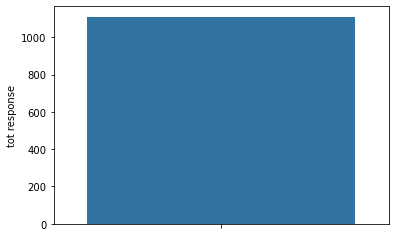

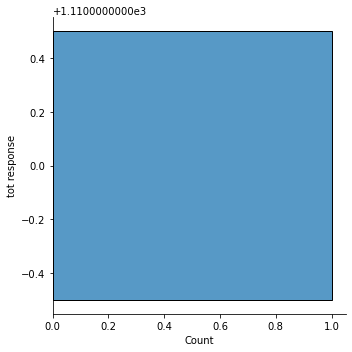

In [11]:
sns.barplot(y='tot response', data=tot_response)
plt.show()
sns.displot(y='tot response', data=tot_response)
plt.show()

In [12]:
responserate=round(((df_mca[df_mca['response']=='Yes'].value_counts().sum())/(df_mca['response'].value_counts().sum()))*100,2)
print(responserate)

16.28


In [13]:
df_mcasummary=df_mca.describe(include='all').T
display(df_mcasummary)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer,6817,6817,BU79786,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,6817,5,California,2346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer lifetime value,6817.0,NaN,NaN,NaN,8130.22934,6949.067972,2119.894333,4090.750678,5810.630529,9075.768214,83325.38119
response,6817,2,No,5707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,6817,3,Basic,4178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,6817,5,Bachelor,2037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective to date,6817,59,2/14/11,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,6817,4,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,6817,2,F,3523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,6817.0,NaN,NaN,NaN,50456.580461,24305.956566,10037.0,28432.0,48081.0,70187.0,99981.0


In [14]:
filteredresponses=df_mca[df_mca['response']=='Yes']
display(filteredresponses)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
13,SJ95423,Arizona,8819.018934,Yes,Basic,High School or Below,1/10/11,Employed,M,99845,...,25,1,8,Corporate Auto,Corporate L3,Offer2,Branch,528.000000,SUV,Medsize
22,YH23384,Arizona,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Personal Auto,Personal L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9102,TL44525,California,2619.337376,Yes,Basic,Bachelor,2/5/11,Employed,M,78618,...,56,0,1,Corporate Auto,Corporate L1,Offer1,Agent,225.578841,Two-Door Car,Medsize
9110,RA89822,California,34611.378960,Yes,Basic,High School or Below,1/14/11,Employed,F,20090,...,59,0,2,Personal Auto,Personal L2,Offer2,Agent,523.200000,Sports Car,Medsize
9119,YX35990,California,5479.555081,Yes,Basic,Master,1/13/11,Employed,M,56005,...,30,1,3,Corporate Auto,Corporate L2,Offer1,Branch,326.400000,Four-Door Car,Small
9122,FH43628,California,25464.820590,Yes,Extended,College,2/1/11,Retired,F,13663,...,66,0,2,Personal Auto,Personal L2,Offer1,Branch,465.600000,Four-Door Car,Small


In [15]:
filteredresponses.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer,1110,1110,OC83172,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,1110,5,California,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer lifetime value,1110.0,NaN,NaN,NaN,7800.365362,6397.333883,2227.072755,3933.813993,5548.031892,9035.671134,41787.90343
response,1110,1,Yes,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,1110,3,Basic,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,1110,5,College,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective to date,1110,56,1/26/11,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,1110,4,Employed,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1110,2,M,558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,1110.0,NaN,NaN,NaN,45419.448649,24785.02774,10312.0,23815.0,37995.0,64125.0,99845.0


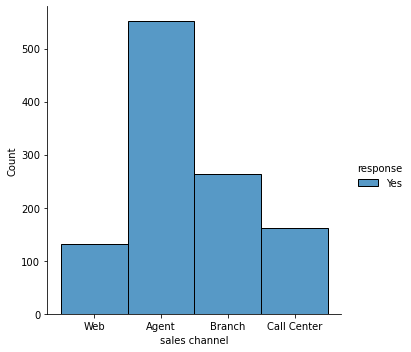

In [16]:
sns.displot(x='sales channel', hue = 'response', data=filteredresponses, multiple='stack')
plt.show()

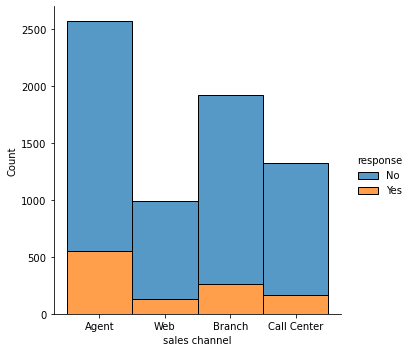

In [17]:
sns.displot(x='sales channel', hue = 'response', data=df_mca, multiple='stack')
plt.show()

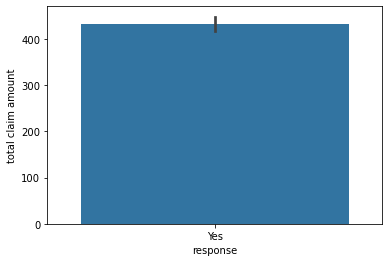

In [18]:
sns.barplot(x='response', y = 'total claim amount', data=filteredresponses)
plt.show()

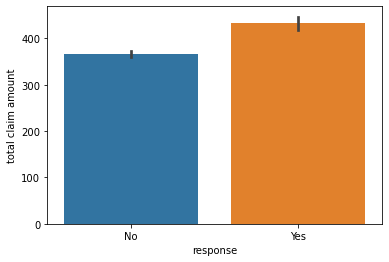

In [19]:
sns.barplot(x='response', y = 'total claim amount', data=df_mca)
plt.show()

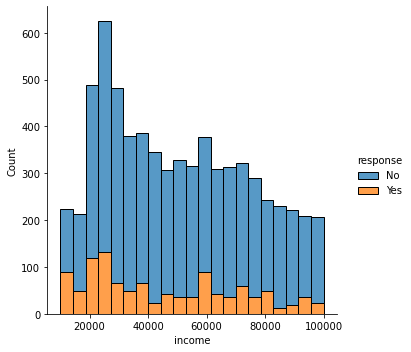

In [20]:
sns.displot(x='income', hue = 'response', data=df_mca, multiple='stack')
plt.show()
#sns.scatterplot(x=df_mca['income'], y=df_mca['response'])
#plt.show()

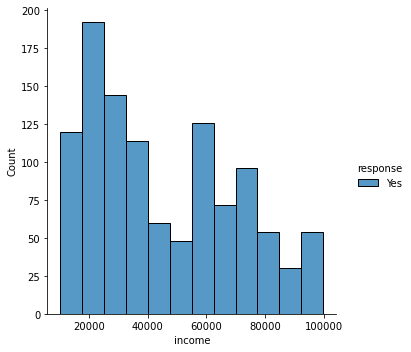

In [21]:
sns.displot(x='income', hue = 'response', data=filteredresponses, multiple='stack')

<AxesSubplot:xlabel='income', ylabel='Count'>

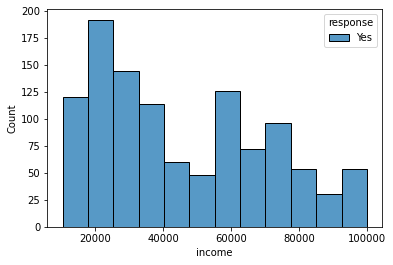

In [22]:
sns.histplot(x='income', hue = 'response', data=filteredresponses, multiple='stack')

# week1 day 4 customer analysis round 4

In [23]:
#fig, ax1 = plt.subplots(2,1,figsize=(10,10)) # figsize=(width,height)
#sns.boxplot(y='gender',x='median_home_val', data=data, ax = ax1[0])
#sns.histplot(x='median_home_val', hue='gender', data=data, ax = ax1[1])
#plt.show()

In [24]:
#data.select_dtypes([np.number])
# 3 Convert the columns that have numerical values (which are now object types) to the numeric type.
#data[col1] = pd.to_numeric(data[col1], erros='')
#data.select_dtypes(['object',np.float])
#data['median_home_val'] =  pd.to_numeric(data['median_home_val'], errors='coerce')
#data._get_numeric_data() # to check if 'median_home_val' and 'ic5' are now listed as numeric data

In [25]:
# to perform the linear regression we'll use the sklearn implementation of linear regression
# we first create the model. This just tells python to be ready to use a linear model, it does not actually compute anything yet

#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

#linearmodel = linear_model.LinearRegression()

Complete the following task:

1 Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

2 Now we will try to check the normality of the numerical variables visually. Use seaborn library to construct distribution plots for the numerical variables

3 Use Matplotlib to construct histograms

4 Do the distributions for different numerical variables look like a normal distribution

5 For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

6 Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [26]:
df_mca.dtypes #1 Check the data types of the columns.

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [27]:
df_mca['effective to date'] = pd.to_datetime(df_mca['effective to date'], errors='coerce') # CHANGES 'effective to date' FROM OBJECT TO datetime64[ns]
#df_mca.dtypes

In [28]:
numerical= df_mca.select_dtypes([np.number,'datetime64']) # Numerical dataframes +time
#display(numerical)

In [29]:
categorical=df_mca.select_dtypes(['object','datetime64']) # Cagegorical dataframes +time
#display(categorical)

In [30]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,6817.0,8130.229340,6949.067972,2119.894333,4090.750678,5810.630529,9075.768214,83325.381190
income,6817.0,50456.580461,24305.956566,10037.000000,28432.000000,48081.000000,70187.000000,99981.000000
monthly premium auto,6817.0,92.963034,34.615160,61.000000,68.000000,83.000000,109.000000,297.000000
months since last claim,6817.0,15.046941,10.064762,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,6817.0,47.832624,27.895350,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,6817.0,0.381840,0.905048,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,6817.0,2.951005,2.390613,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,6817.0,377.840789,252.648952,0.099007,210.100003,340.800000,498.612632,2893.239678


In [31]:
#numerical.columns

In [32]:
#fig, ax1 = plt.subplots(2,3,figsize=(10,10)) # figsize=(width,height)
#sns.boxplot(y='gender',x='median_home_val', data=data, ax = ax1[0])
#sns.histplot(x='median_home_val', hue='gender', data=data, ax = ax1[1])
#plt.show()

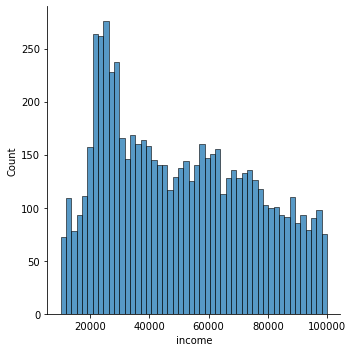

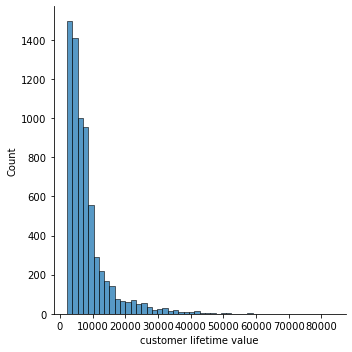

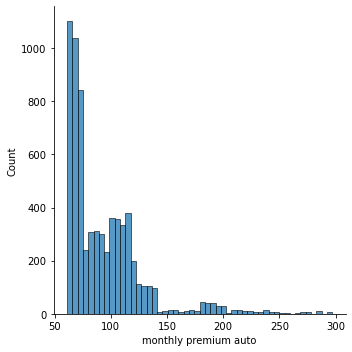

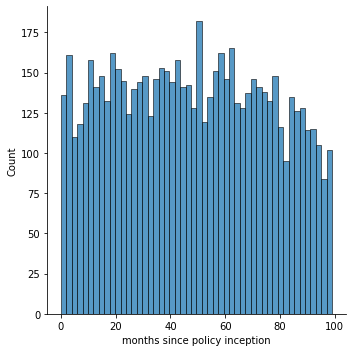

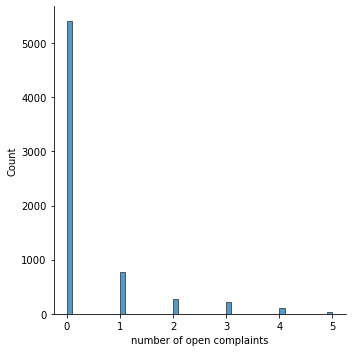

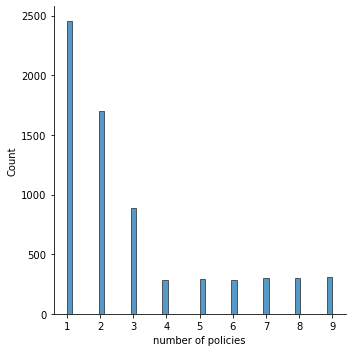

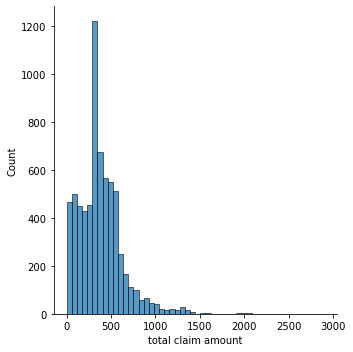

In [33]:
#2. Use seaborn library to construct distribution plots for the numerical variables

sns.displot(x='income', bins=50, data=numerical)
sns.displot(x='customer lifetime value', bins=50, data=numerical)
sns.displot(x='monthly premium auto', bins=50, data=numerical)
#sns.displot(x='months since last claim	', bins=50, data=numerical)
sns.displot(x='months since policy inception', bins=50, data=numerical)
sns.displot(x='number of open complaints', bins=50, data=numerical)
sns.displot(x='number of policies', bins=50, data=numerical)
sns.displot(x='total claim amount', bins=50, data=numerical)

#sns.histplot(x='median_home_val', hue='gender', data=data, ax = ax1[1])
plt.show()

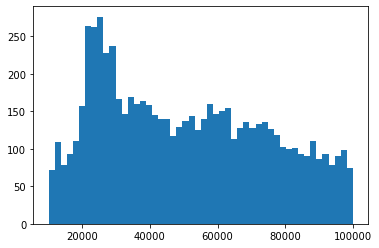

In [34]:
#3 Use Matplotlib to construct histograms
plt.hist('income', bins = 50, data=numerical)
plt.show()


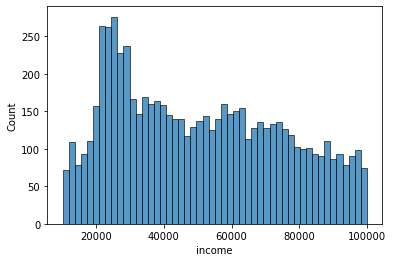

In [36]:
sns.histplot(x='income',bins=50,data=numerical)
plt.show()

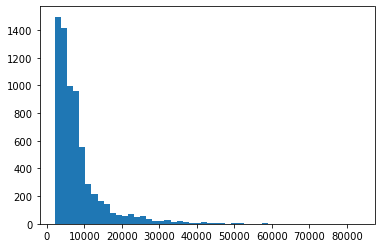

In [50]:
plt.hist('customer lifetime value', bins = 50, data=numerical)
plt.show()



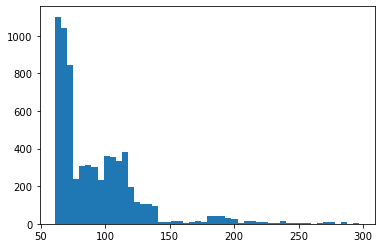

In [43]:
plt.hist('monthly premium auto', bins = 50, data=numerical)
plt.show()


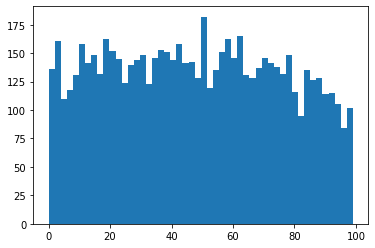

In [44]:
plt.hist('months since policy inception', bins = 50, data=numerical)
plt.show()


In [48]:
#plt.hist('number of open complaints', bins = 50, data=numerical)
#plt.show()

In [49]:
#plt.hist('number of policies', bins = 50, data=numerical)
#plt.show()

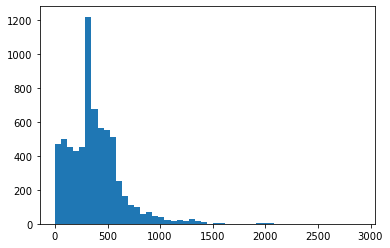

In [47]:
plt.hist('total claim amount', bins = 50, data=numerical)
plt.show()

4 Do the distributions for different numerical variables look like a normal distribution:

there might be some normal distribution with positive tail for total claim amount. 

Income show a potential of normal distribution with a bias a low income

month since policy inception might just be longitudenal data but if the months tend to drop and taper after 100, it can be an indicatioin for the life time of the policy or client and an indication of normal distribution

Monthly premium auto looks like 2 sets, 1 looking like a high concentration below 100 and then more of a normal distribution at higher monthly payments >145. 

Number of policy and number of open claim follow no distribtution which makes sense. 

customer lifetime value shows clearly a negative exponential/ half  flipped parabolic. 

#


In [55]:
#5 For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
numerical_correlation=numerical.corr()
display(numerical_correlation)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.002915,0.399491,0.018531,0.011275,-0.025038,0.022683,0.245464
income,0.002915,1.000000,-0.012372,-0.034453,0.015799,0.016642,-0.001324,-0.221879
monthly premium auto,0.399491,-0.012372,1.000000,0.005887,0.020112,-0.006476,-0.026795,0.636084
months since last claim,0.018531,-0.034453,0.005887,1.000000,-0.039993,0.007744,0.017022,0.001460
months since policy inception,0.011275,0.015799,0.020112,-0.039993,1.000000,0.005763,-0.020548,-0.003733
number of open complaints,-0.025038,0.016642,-0.006476,0.007744,0.005763,1.000000,0.010004,-0.011664
number of policies,0.022683,-0.001324,-0.026795,0.017022,-0.020548,0.010004,1.000000,-0.012253
total claim amount,0.245464,-0.221879,0.636084,0.001460,-0.003733,-0.011664,-0.012253,1.000000


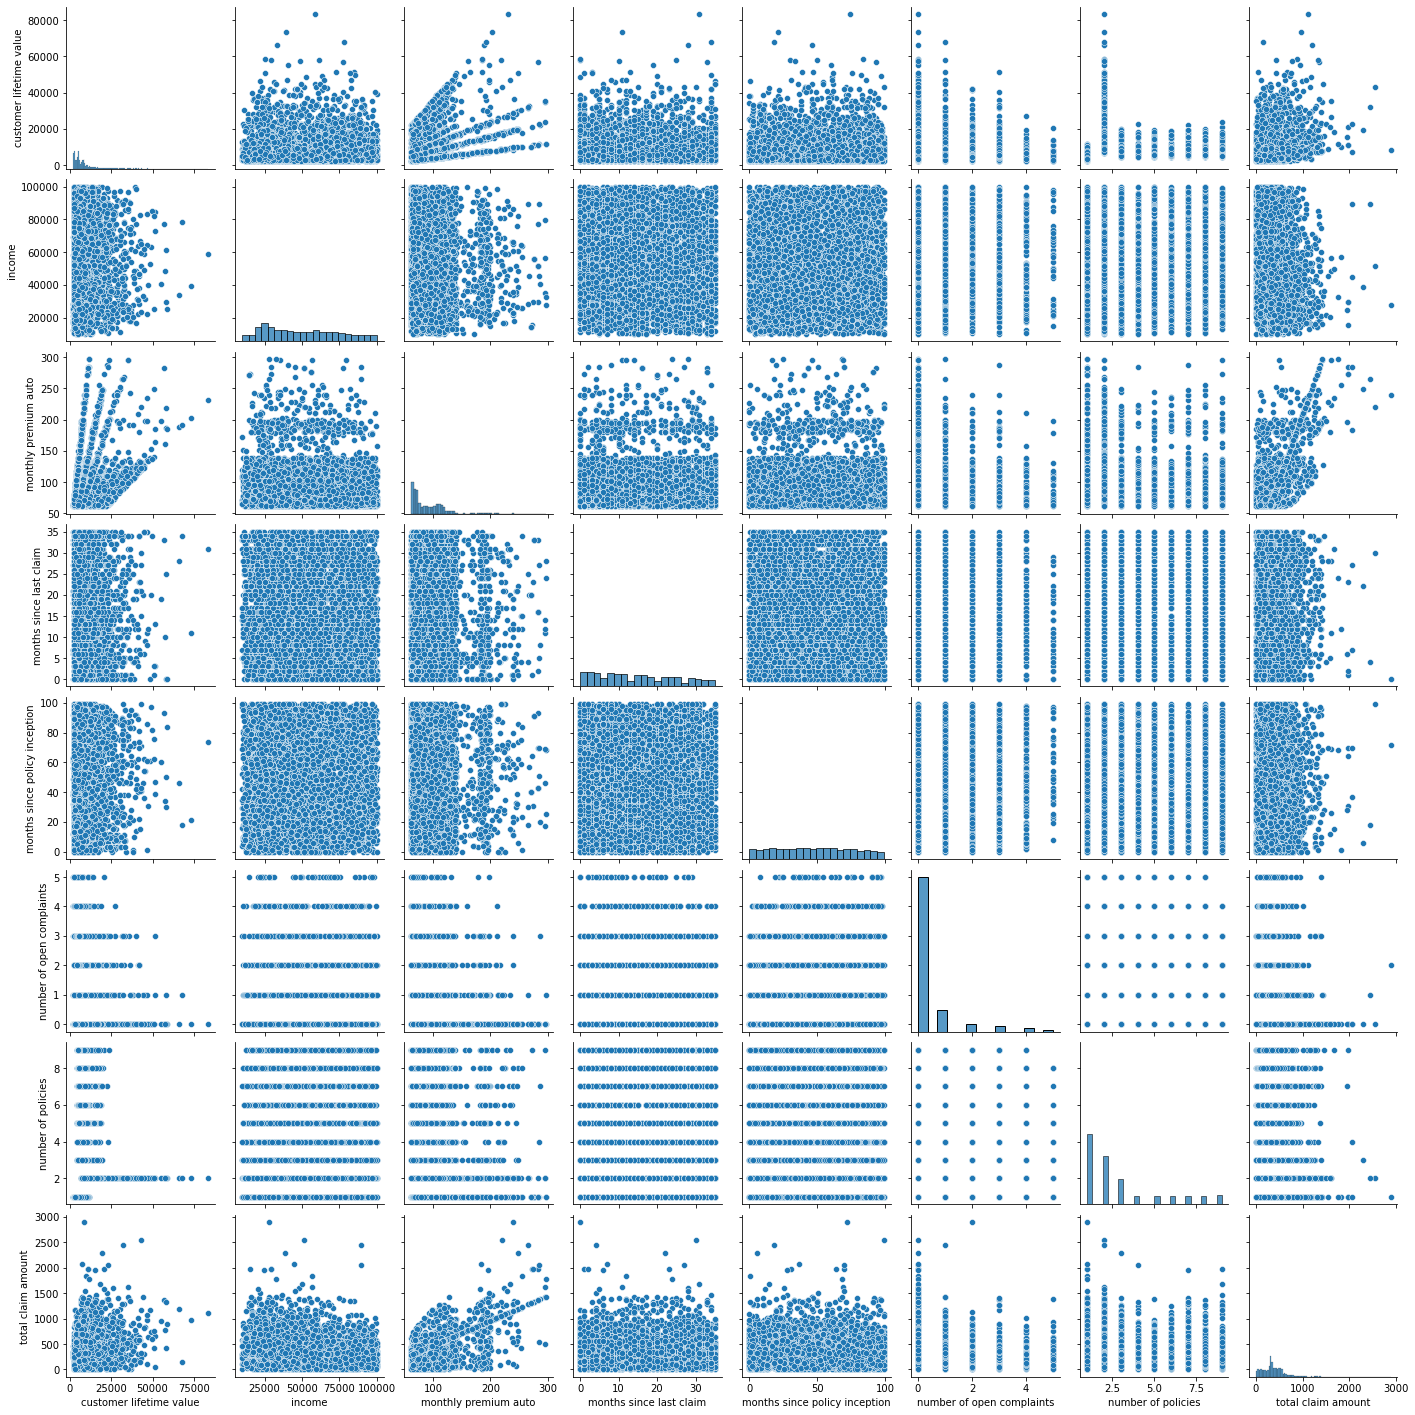

In [53]:
sns.pairplot(numerical)
plt.show()

looking the paircharts above there mith be some correlations between monthly premium auto, total claim amount,customer liftime value,

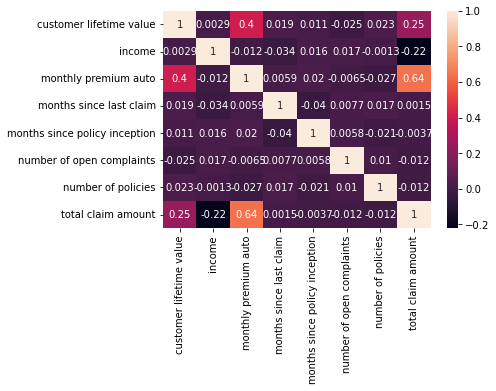

In [56]:
sns.heatmap(numerical_correlation, annot=True)
plt.show()

In [57]:
#There is a week correlation between monthly premium auto and total claim amount as seen from the heat map. 

# End of round 4